### 인천공항 취항국가 별 항공통계 (운항편 전체) 항공 정보
#### https://www.data.go.kr/dataset/15001017/openapi.do

In [1]:
import pandas as pd
import requests
import numpy as np

##### 참고 : http://makeshare.org/bbs/board.php?bo_table=raspberrypi&wr_id=63

In [9]:
key = 

### 날짜(월) : 200301~201812, 정기/부정기, 여객기/화물기

In [19]:
month = list(range(200301, 200313))
month

[200301,
 200302,
 200303,
 200304,
 200305,
 200306,
 200307,
 200308,
 200309,
 200310,
 200311,
 200312]

In [20]:
for m in month :
    month.append(m+100)
    if len(month) == 192 :
        break
        
#200301 ~ 201812
month = list(map(str, month))

In [10]:
data_type = '&_type=json'
from_month = '&from_month=200301'
to_month = '&to_month=200301'

api = 'http://openapi.airport.kr/openapi/service/AviationStatsByCountry/getTotalNumberOfFlight?serviceKey='

In [11]:
url = api+key+from_month+to_month+data_type

In [12]:
response = requests.get(url)
response.status_code #200나오면 성공!

200

In [14]:
response.json()['response']['body']['items']['item'][0]

{'arrFlight': 36,
 'country': '기타',
 'depFlight': 31,
 'flights': 67,
 'region': '기타'}

#### 저장할 data frame 칼럼 지정
- date
- periodicity(정기:0,부정기:1)
- plane(여객기 : passenger, 화물기 : freight)
- 불러올 데이터의 column들

#### date,regular,type별로 api로 불러올 함수 만들기

In [21]:
def load_api (date, periodicity, plane) :
    #date : 한 달 씩 가져올 것
    #periodicity : str
    
    data_type = '&_type=json'
    from_month = '&from_month='+date
    to_month = '&to_month='+date
    
    if plane == 'passenger' :
        pax_cargo = 'Y'
    else :
        pax_cargo = 'N'
    
    api = 'http://openapi.airport.kr/openapi/service/AviationStatsByCountry/getTotalNumberOfFlight?serviceKey='
    url = api+key+from_month+to_month+data_type+'&periodicity='+periodicity+'&pax_cargo='+pax_cargo
    response = requests.get(url)
    
    json = response.json()
    json = json['response']['body']['items']['item']
    
    n = len([*json[0]]) #json파일의 column 개수
    dt = pd.DataFrame(columns=['arrFlight','country','depFlight','flights','region','date', 'periodicity','plane'])
    
    for column in dt.columns.tolist()[:n] :        
        dt[column] = [x[column] for x in json]
    
    for column in dt.columns.tolist()[n:] :
        dt[column] = eval(column)
        
    return(dt)

In [24]:
airplane = pd.DataFrame(columns=['arrFlight','country','depFlight','flights','region','date', 'periodicity','plane'])
#flights : 그 달에 있었던 비행 수
airplane

,arrFlight,country,depFlight,flights,region,date,periodicity,plane


In [23]:
load_api(month[0], '0', 'passenger')

,arrFlight,country,depFlight,flights,region,date,periodicity,plane
0,31,기타,31,62,기타,200301,0,passenger
1,9,이집트,9,18,기타,200301,0,passenger
2,18,인도,18,36,기타,200301,0,passenger
3,60,괌,60,120,대양주,200301,0,passenger
4,53,뉴질랜드,53,106,대양주,200301,0,passenger
5,62,사이판,62,124,대양주,200301,0,passenger
6,0,피지,0,0,대양주,200301,0,passenger
7,23,하와이,23,46,대양주,200301,0,passenger
8,75,호주,72,147,대양주,200301,0,passenger
9,51,말레이시아,44,95,동남아,200301,0,passenger


In [25]:
for m in month :
    airplane = pd.concat([airplane, load_api(m, '0', 'passenger')], axis = 0)
    airplane = pd.concat([airplane, load_api(m, '0', 'freight')], axis = 0)
    airplane = pd.concat([airplane, load_api(m, '1', 'passenger')], axis = 0)
    airplane = pd.concat([airplane, load_api(m, '1', 'freight')], axis = 0)
#airplane

In [26]:
airplane.shape

(21275, 8)

In [27]:
airplane.loc[(airplane['date']=='200301') & (airplane['region'] == '대양주')]

,arrFlight,country,depFlight,flights,region,date,periodicity,plane
3,60,괌,60,120,대양주,200301,0,passenger
4,53,뉴질랜드,53,106,대양주,200301,0,passenger
5,62,사이판,62,124,대양주,200301,0,passenger
6,0,피지,0,0,대양주,200301,0,passenger
7,23,하와이,23,46,대양주,200301,0,passenger
8,75,호주,72,147,대양주,200301,0,passenger
2,9,뉴질랜드,9,18,대양주,200301,1,passenger
3,1,하와이,1,2,대양주,200301,1,passenger
4,0,호주,3,3,대양주,200301,1,passenger
2,1,호주,0,1,대양주,200301,1,freight


In [28]:
#flights 변수가 월별 country별 비행수
airplane.groupby(['date','country']).count().max()

arrFlight      4
depFlight      4
flights        4
region         4
periodicity    4
plane          4
dtype: int64

In [29]:
airplane.index = list(range(airplane.shape[0]))
airplane.head()

,arrFlight,country,depFlight,flights,region,date,periodicity,plane
0,31,기타,31,62,기타,200301,0,passenger
1,9,이집트,9,18,기타,200301,0,passenger
2,18,인도,18,36,기타,200301,0,passenger
3,60,괌,60,120,대양주,200301,0,passenger
4,53,뉴질랜드,53,106,대양주,200301,0,passenger


In [30]:
airplane['year'] = [date[:4] for date in airplane['date']]
airplane['month'] = [date[4:] for date in airplane['date']]

In [36]:
#string으로 들어있는 값들 ',' 뺴고 숫자로 바꿈
airplane.loc[airplane['flights'].astype(str).str.isnumeric()==False , 'flights'] = airplane.loc[airplane['flights'].astype(str).str.isnumeric()==False , 'flights'].apply(lambda x: x.replace(',',''))
airplane.flights = pd.to_numeric(airplane.flights)

In [38]:
#숫자로 바뀌었다. -> 연도별 항공 수
airplane.groupby(['year'])['flights'].sum()

year
2003    126513
2004    146141
2005    157134
2006    177841
2007    207397
2008    206985
2009    193919
2010    210218
2011    224687
2012    248031
2013    264586
2014    284575
2015    300634
2016    334528
2017    355162
2018    381747
Name: flights, dtype: int64

### date

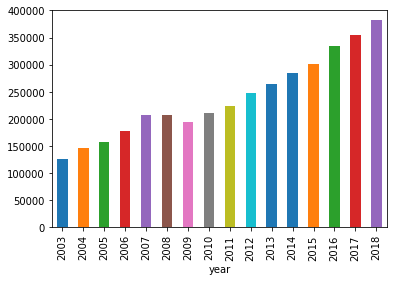

In [42]:
#전체 데이터 연도별 비행수
airplane.groupby(['year'])['flights'].sum().plot('bar')

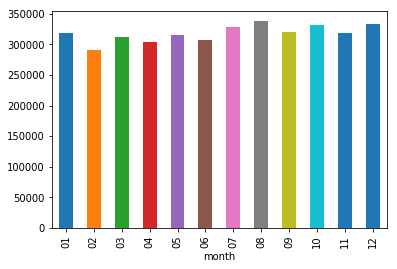

In [43]:
#전체 데이터 월별 비행수
airplane.groupby(['month'])['flights'].sum().plot('bar')

In [47]:
import matplotlib.pyplot as plt

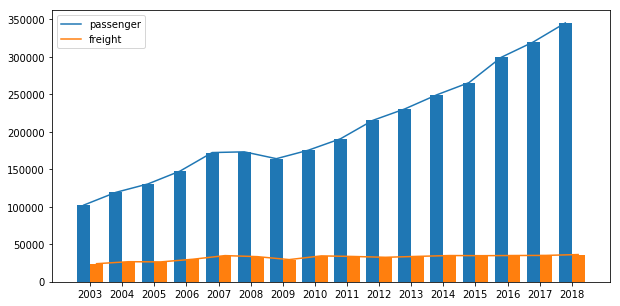

In [49]:
#by year
#화물은 비슷 승객은 엄청 늘어난 것을 알 수 있다
plt.figure(figsize=(10,5))

X = airplane.year.unique()
Y = airplane.loc[airplane['plane'] == 'passenger',].groupby(['year'])['flights'].sum()
Z = airplane.loc[airplane['plane'] == 'freight',].groupby(['year'])['flights'].sum()
_X = np.arange(len(X))

plt.bar(_X - 0.2, Y, 0.4)
plt.plot(_X - 0.2, Y, 0.4)
plt.bar(_X + 0.2, Z, 0.4)
plt.plot(_X + 0.2, Z, 0.4, color = 'C1')
plt.xticks(_X, X)
plt.legend(['passenger','freight'])
plt.show()

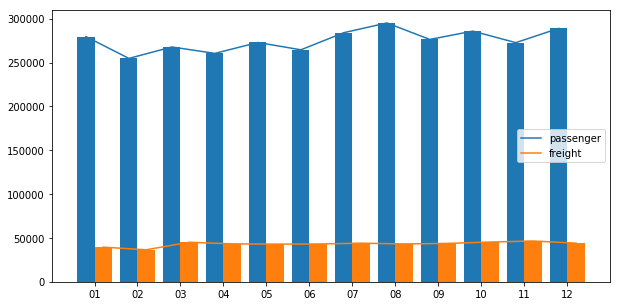

In [51]:
#by month
#여름, 겨울에 승객 수가 늘어나는 것을 알 수 있다
plt.figure(figsize=(10,5))

X = airplane.month.unique()
Y = airplane.loc[airplane['plane'] == 'passenger',].groupby(['month'])['flights'].sum()
Z = airplane.loc[airplane['plane'] == 'freight',].groupby(['month'])['flights'].sum()
_X = np.arange(len(X))

plt.bar(_X - 0.2, Y, 0.4)
plt.plot(_X - 0.2, Y, 0.4)
plt.bar(_X + 0.2, Z, 0.4)
plt.plot(_X + 0.2, Z, 0.4, color = 'C1')

plt.xticks(_X, X) 
plt.legend(['passenger','freight'])
plt.show()

### country

In [52]:
len(airplane.country.unique())

105

In [60]:
#counry별 비행 수
airplane.groupby(['country'])['flights'].sum().sort_values(ascending=False)

country
중국              987604
일본              677787
미국              430561
홍콩              208579
필리핀             184408
태국              183234
베트남             160405
대만               96303
싱가포르             79004
러시아              71759
말레이시아            70731
독일               67780
인도네시아            44465
괌                40443
캄보디아             39566
캐나다              35426
프랑스              32565
호주               32331
하와이              28764
사이판              28141
영국               26813
마카오              23339
아랍에미리트           23271
터키               19908
몽골               19412
이탈리아             18488
네덜란드             17950
인도               17270
카타르              12002
우즈베키스탄           11988
                 ...  
우간다                 10
투르크메니스탄             10
타지키스탄                6
베네수엘라                5
요르단                  5
나이지리아                4
아이티                  4
파푸아뉴기니               4
우크라이나                4
이라크                  3
남아프리카공화국             3
아르메니아                3
조지아

### region

In [61]:
len(airplane.region.unique())

9

In [62]:
#region 비행 수
airplane.groupby(['region'])['flights'].sum().sort_values(ascending=False)

region
중국     987604
동남아    778496
일본     677787
미주     471963
동북아    347633
유럽     331194
대양주    151406
중동      42628
기타      31387
Name: flights, dtype: int64

#### only China

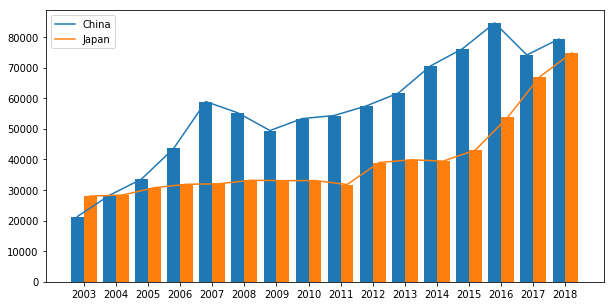

In [74]:
#by year, region
#연도별 TOP2 중국, 일본

plt.figure(figsize=(10,5))

X = airplane.year.unique()
Y1 = airplane.loc[(airplane['plane'] == 'passenger') & (airplane.country=='중국')].groupby(['year'])['flights'].sum()
Y2 = airplane.loc[(airplane['plane'] == 'passenger') & (airplane.country=='일본')].groupby(['year'])['flights'].sum()

_X = np.arange(len(X))

plt.bar(_X - 0.2, Y1, 0.4)
plt.plot(_X - 0.2, Y1, 0.4)
plt.bar(_X +0.2, Y2, 0.4)
plt.plot(_X +0.2, Y2, 0.4, color = 'C1')

plt.xticks(_X, X)
plt.legend(['China','Japan'])
plt.show()